In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2022/players.csv
/kaggle/input/nfl-big-data-bowl-2022/PFFScoutingData.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2019.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2020.csv
/kaggle/input/nfl-big-data-bowl-2022/games.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv
/kaggle/input/nfl-big-data-bowl-2022/plays.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
%matplotlib inline
import seaborn as sns

#(Credit for the below code goes to @ANZ check out his notebook as well)
cmap = cm.get_cmap('GnBu',12) #colormap and number
col_def =[]
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    col_def.append(rgb2hex(rgb))
    print(rgb2hex(rgb))

#f7fcf0
#e6f5e1
#d7efd1
#c5e8c2
#abdeb6
#8bd2bf
#6bc3c9
#4bafd1
#3193c2
#1878b4
#085da0
#084081


### Players Data

In [3]:
players = pd.read_csv('../input/nfl-big-data-bowl-2022/players.csv')
players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


## Data Cleaning

In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


**There seem to be NaN values in birthDate and collegeName. Let's get rid of the NaNs in birthdate, and create cols for birth year and birth month.**

In [5]:
players.isnull().sum()

nflId           0
height          0
weight          0
birthDate      17
collegeName     8
Position        0
displayName     0
dtype: int64

In [6]:
players["birthYear"] = 0
players["birthMonth"] = 0
#There are NA values in birthDate so that we should drop them
players.dropna(subset=["birthDate"], inplace=True)
for idx, row in players.iterrows():
    if len(row['birthDate'].split('/')) == 3: # 05/17/1994 
        players.loc[idx, 'birthYear'] = row['birthDate'].split('/')[2]
        players.loc[idx, 'birthMonth'] = row['birthDate'].split('/')[0]
        
    elif len(row['birthDate'].split('-')) == 3: # 1995-05-05
        players.loc[idx, 'birthYear'] = row['birthDate'].split('-')[0]
        players.loc[idx, 'birthMonth'] = row['birthDate'].split('-')[1]

In [7]:
players.isnull().sum()

nflId          0
height         0
weight         0
birthDate      0
collegeName    3
Position       0
displayName    0
birthYear      0
birthMonth     0
dtype: int64

**Converting heights to CM and weights to Kg**

In [8]:
players_heights = players["height"] # Get the Height data from DataFrame
players_heights = players_heights.apply(lambda x: x.split("-")) # Split the heights by hyphen ("-")

# Convert Heights to Centimeters and add them to DataFrame
players["height"] = players_heights.apply(lambda x: int(x[0]) * 12 + int(x[1]) if len(x) == 2 else int(x[0])) * 2.54

# Convert Weights to Kilograms and them to DataFrame
players["weight"] = round(players.weight * 0.453592, 2)

players

,nflId,height,weight,birthDate,collegeName,Position,displayName,birthYear,birthMonth
0,42901,185.42,94.35,1992-07-25,James Madison,SS,Dean Marlowe,1992,07
1,43501,182.88,99.79,1994-08-11,Central Michigan,FS,Kavon Frazier,1994,08
2,43534,182.88,92.99,1993-06-02,Illinois,SS,Clayton Fejedelem,1993,06
3,43535,185.42,106.59,1992-12-22,Temple,MLB,Tyler Matakevich,1992,12
4,44174,185.42,107.05,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993,02
...,...,...,...,...,...,...,...,...,...
2727,33216,190.50,145.15,06/16/1986,Central Florida,G,Josh Sitton,1986,06
2728,33184,190.50,120.20,05/02/1985,Winston-Salem State,DE,William Hayes,1985,05
2729,45651,175.26,89.81,06/16/1993,Iowa,WR,Riley McCarron,1993,06
2730,41284,185.42,104.33,1992-10-20,LSU,RB,Jeremy Hill,1992,10


In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2715 entries, 0 to 2731
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nflId        2715 non-null   int64  
 1   height       2715 non-null   float64
 2   weight       2715 non-null   float64
 3   birthDate    2715 non-null   object 
 4   collegeName  2712 non-null   object 
 5   Position     2715 non-null   object 
 6   displayName  2715 non-null   object 
 7   birthYear    2715 non-null   object 
 8   birthMonth   2715 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 276.6+ KB


**Now the data is ready to work with. Everything is neat and tidy🥳🥳**

## Time For Some EDA on Players DataSet

In [10]:
len(players['displayName'].unique())

2701

**Let's get some data on the colleges**

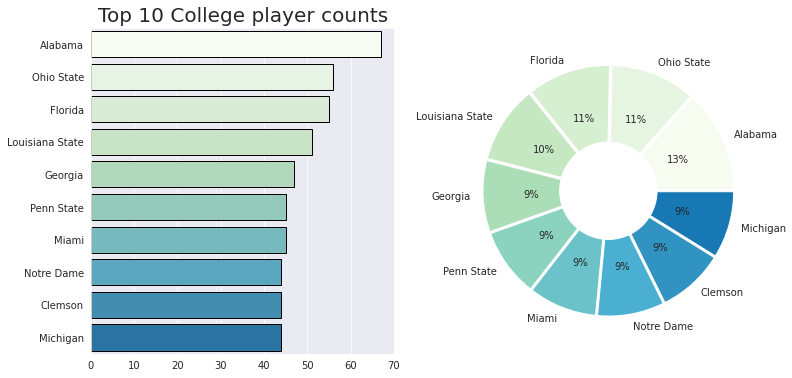

In [11]:
college_df = players['collegeName'].value_counts()
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0] = sns.barplot(x=college_df[:10].values, y=college_df[:10].index, edgecolor="black",palette=col_def, ax=axes[0])
axes[0].set_title("Top 10 College player counts", fontsize=20)
axes[1].pie(x= college_df[:10], labels = college_df[:10].index, colors=col_def, autopct='%.0f%%',
           explode=[0.03 for i in college_df[:10].index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

**From the above graph, we can see that, Alabama is at the top with approximately 68 players.**

**Postions played by players**

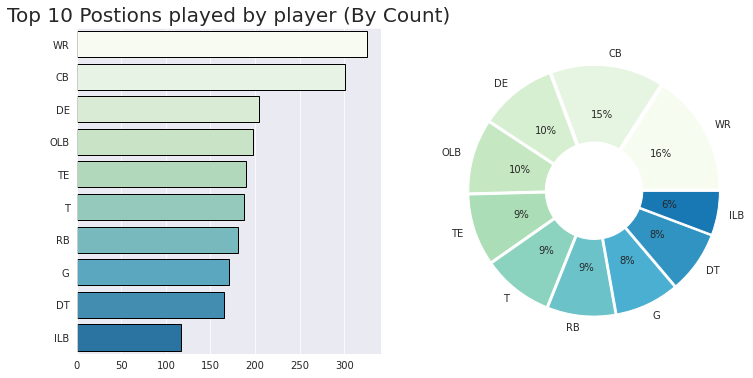

In [12]:
pos_df = players['Position'].value_counts()
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0] = sns.barplot(x=pos_df[:10].values, y=pos_df[:10].index, edgecolor="black",palette=col_def, ax=axes[0])
axes[0].set_title("Top 10 Postions played by player (By Count)", fontsize=20)
axes[1].pie(x= pos_df[:10], labels = pos_df[:10].index, colors=col_def, autopct='%.0f%%',
           explode=[0.03 for i in pos_df[:10].index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

**The postion 'WR' is played the most by the players. It is approximately 320 i.e is 16%**

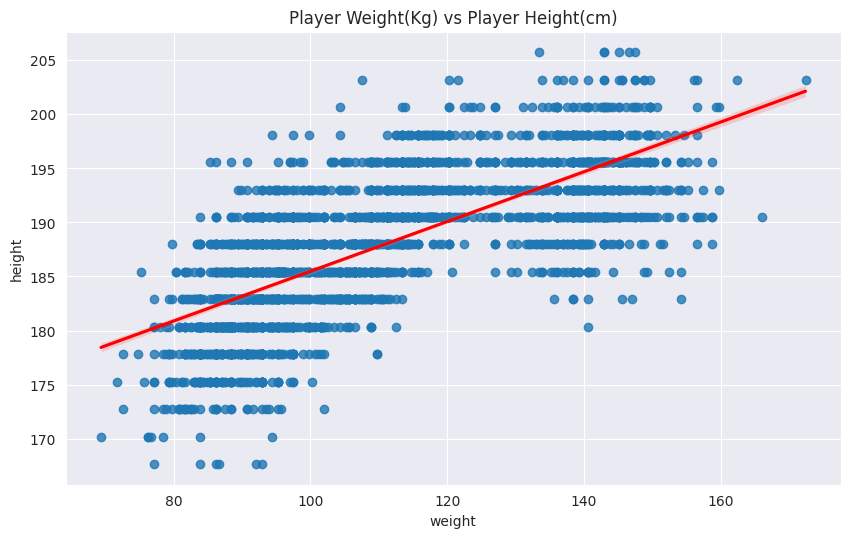

In [13]:
plt.figure(figsize=(10, 6), dpi=100)
sns.regplot(x=players.weight, y=players.height, line_kws={"color": "red"})
plt.title("Player Weight(Kg) vs Player Height(cm)");

**It looks like the taller the player is the heavier he is.**

**Weight and Height Distribution.**

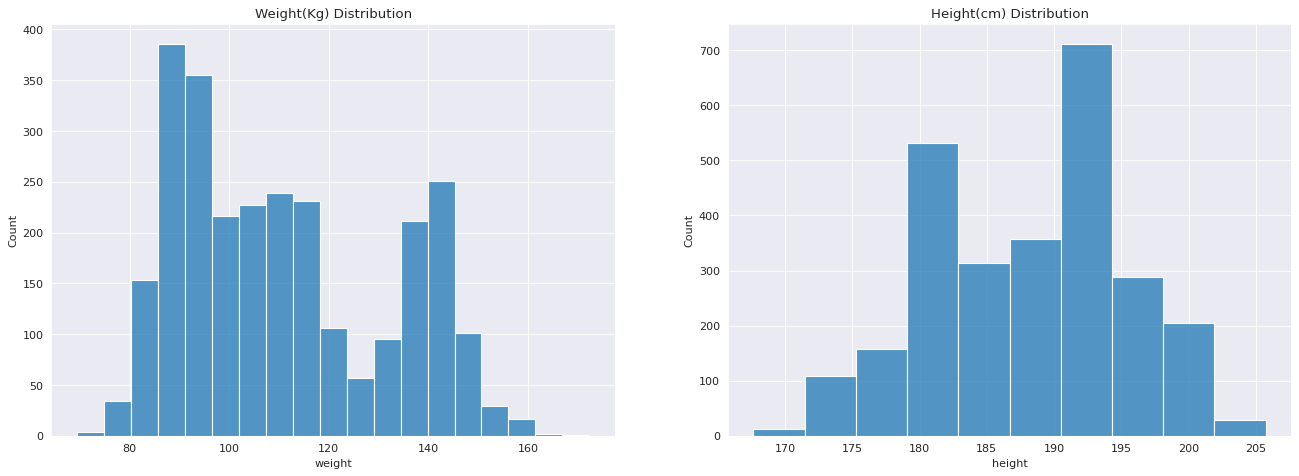

In [14]:
fig = plt.figure(figsize=(20, 15), dpi=80)

ax1 = fig.add_subplot(223)
sns.histplot(players.weight, ax=ax1)
ax1.set_title("Weight(Kg) Distribution")

ax2 = fig.add_subplot(224)
sns.histplot(players.height, ax=ax2, bins=10)
ax2.set_title("Height(cm) Distribution");

**From the above distribution, we can see that most of the players are between 190cm - 195cm height(390+310 = 700 approximately). Players who are on the shorter side i.e < 170cm are very less roughly 30 in count. Same is with the taller side i.e 200cm - 205cm, And most players are seen to be in between 80kg to 100. Very less people on both the extremes.**

**Player birthyear and birthmonth Distribution**

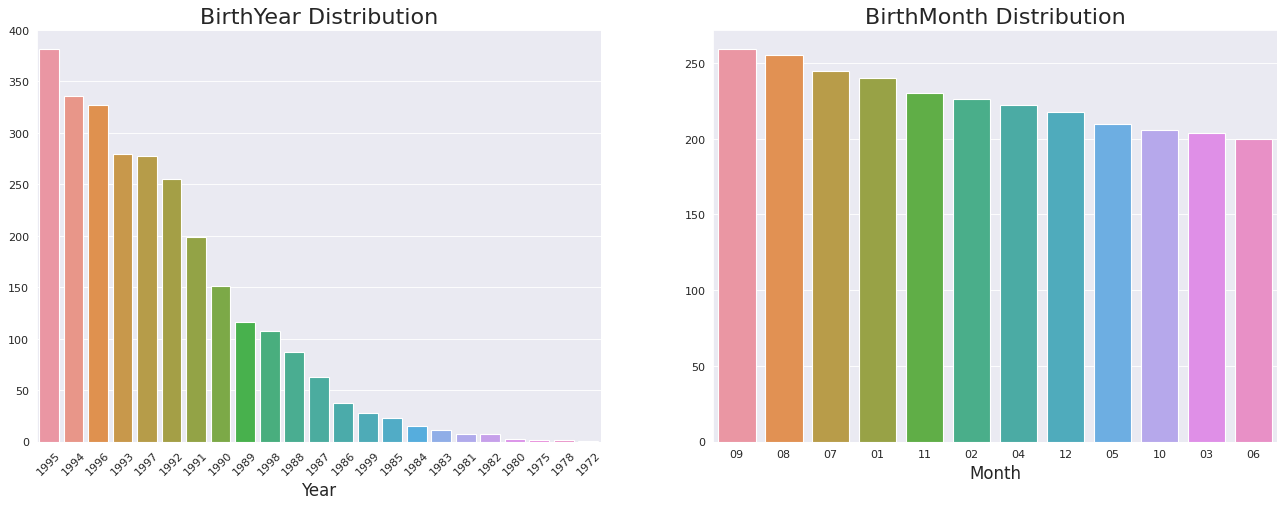

In [15]:
fig = plt.figure(figsize=(20, 15), dpi=80)

birthyear = players['birthYear'].value_counts()
ax1 = fig.add_subplot(223)
sns.barplot(x=birthyear.index, y=birthyear.values, ci=None, ax=ax1)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("BirthYear Distribution",size=20)
plt.xlabel("Year", size=15)

birthmonth = players['birthMonth'].value_counts()
ax2 = fig.add_subplot(224)
sns.barplot(x=birthmonth.index, y=birthmonth.values, ci=None, ax=ax2)
ax2.set_title("BirthMonth Distribution",size=20)
plt.xlabel("Month",size=15);

**From the above charts, it can be determined that most players are born in the year 1995. The most frequent birth month is September.**

### Game data

In [16]:
games = pd.read_csv("../input/nfl-big-data-bowl-2022/games.csv")
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           764 non-null    int64 
 1   season           764 non-null    int64 
 2   week             764 non-null    int64 
 3   gameDate         764 non-null    object
 4   gameTimeEastern  764 non-null    object
 5   homeTeamAbbr     764 non-null    object
 6   visitorTeamAbbr  764 non-null    object
dtypes: int64(3), object(4)
memory usage: 41.9+ KB


**Making sure that the gameDate doesn't have any null values in the form of '0' or '0/0/0'**

In [18]:
print(games[games['gameDate'] == '0'])

Empty DataFrame
Columns: [gameId, season, week, gameDate, gameTimeEastern, homeTeamAbbr, visitorTeamAbbr]
Index: []


In [19]:
print(games[games['gameDate'] == '0/0/0'])

Empty DataFrame
Columns: [gameId, season, week, gameDate, gameTimeEastern, homeTeamAbbr, visitorTeamAbbr]
Index: []


**Making sure that gameTimeEastern doesn't have any null values in forms like '0' or '0:0:0'**

In [20]:
print(games[games['gameTimeEastern'] == '0'])

Empty DataFrame
Columns: [gameId, season, week, gameDate, gameTimeEastern, homeTeamAbbr, visitorTeamAbbr]
Index: []


In [21]:
print(games[games['gameTimeEastern'] == '0:0:0'])

Empty DataFrame
Columns: [gameId, season, week, gameDate, gameTimeEastern, homeTeamAbbr, visitorTeamAbbr]
Index: []


**Now that we are sure let's get on with some EDA on games data**

In [22]:
games.describe()

,gameId,season,week
count,7.640000e+02,764.000000,764.000000
mean,2.019131e+09,2019.003927,9.075916
std,8.495216e+05,0.816755,4.999554
min,2.018091e+09,2018.000000,1.000000
25%,2.018121e+09,2018.000000,5.000000
50%,2.019110e+09,2019.000000,9.000000
75%,2.020101e+09,2020.000000,14.000000
max,2.021010e+09,2020.000000,17.000000


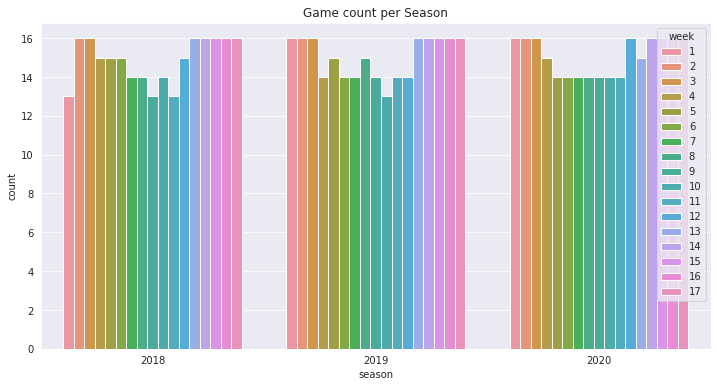

In [23]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x=games['season'], hue=games['week'])
plt.title('Game count per Season');

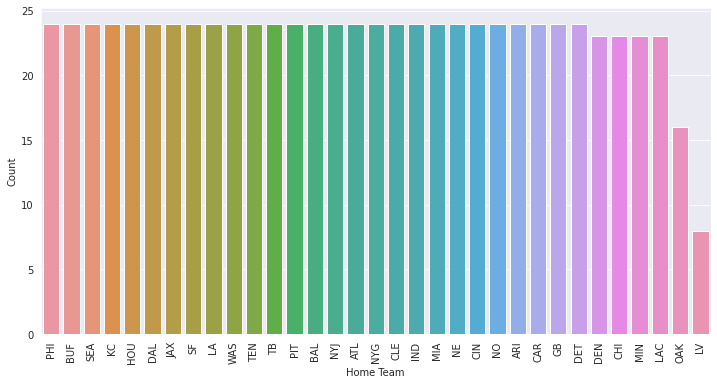

In [24]:
fig = plt.figure(figsize=(12,6))
home = games['homeTeamAbbr'].value_counts()
sns.barplot(x=home.index, y=home.values, ci=None)
plt.xlabel("Home Team")
plt.ylabel("Count")
plt.xticks(rotation=90);

**It seems like all the teams got an equal chance to play as home teams except for the 'LV' which really has very less no of plays as a home team**

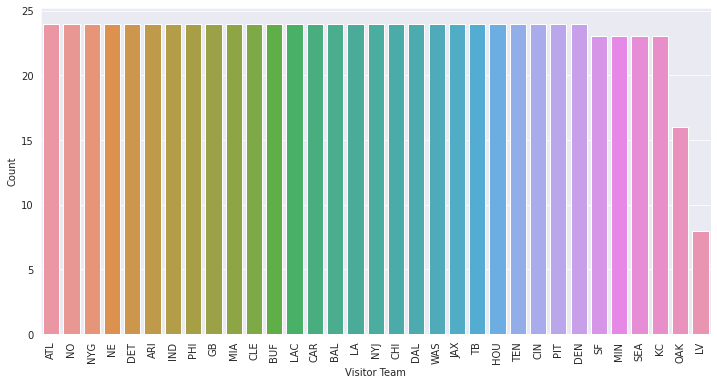

In [25]:
fig = plt.figure(figsize=(12,6))
visitor = games['visitorTeamAbbr'].value_counts()
sns.barplot(x=visitor.index, y=visitor.values, ci=None)
plt.xlabel("Visitor Team")
plt.ylabel("Count")
plt.xticks(rotation=90);

**I think the teams get an equal chance to play in their home fields and outside of their home fields as well.**

### Plays Data

In [26]:
plays = pd.read_csv('../input/nfl-big-data-bowl-2022/plays.csv')
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [27]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

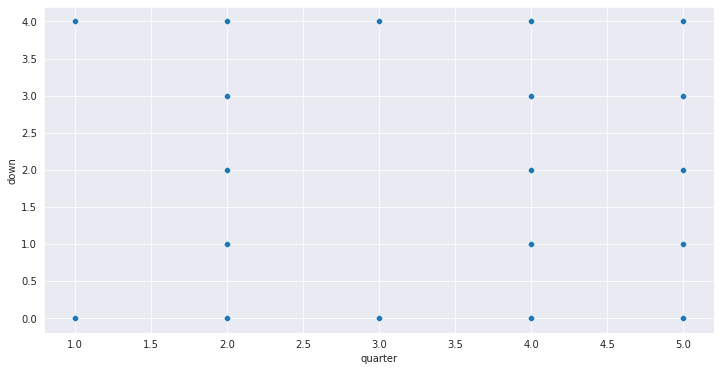

In [28]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='quarter', y='down', data=plays)
plt.show()

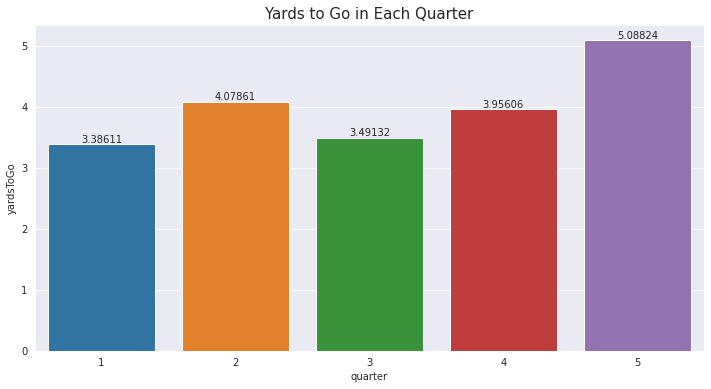

In [29]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(x='quarter', y='yardsToGo', data=plays, ci=None)
g.bar_label(g.containers[0])
plt.title('Yards to Go in Each Quarter', size=15)
plt.show()

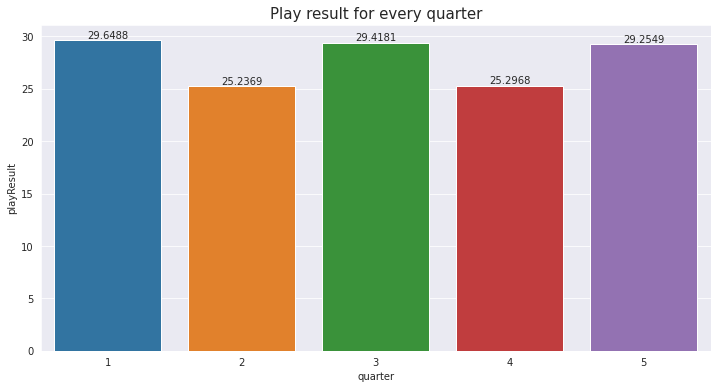

In [30]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(x='quarter', y='playResult', data=plays, ci=None)
g.bar_label(g.containers[0])
plt.title("Play result for every quarter", size=15)
plt.show()

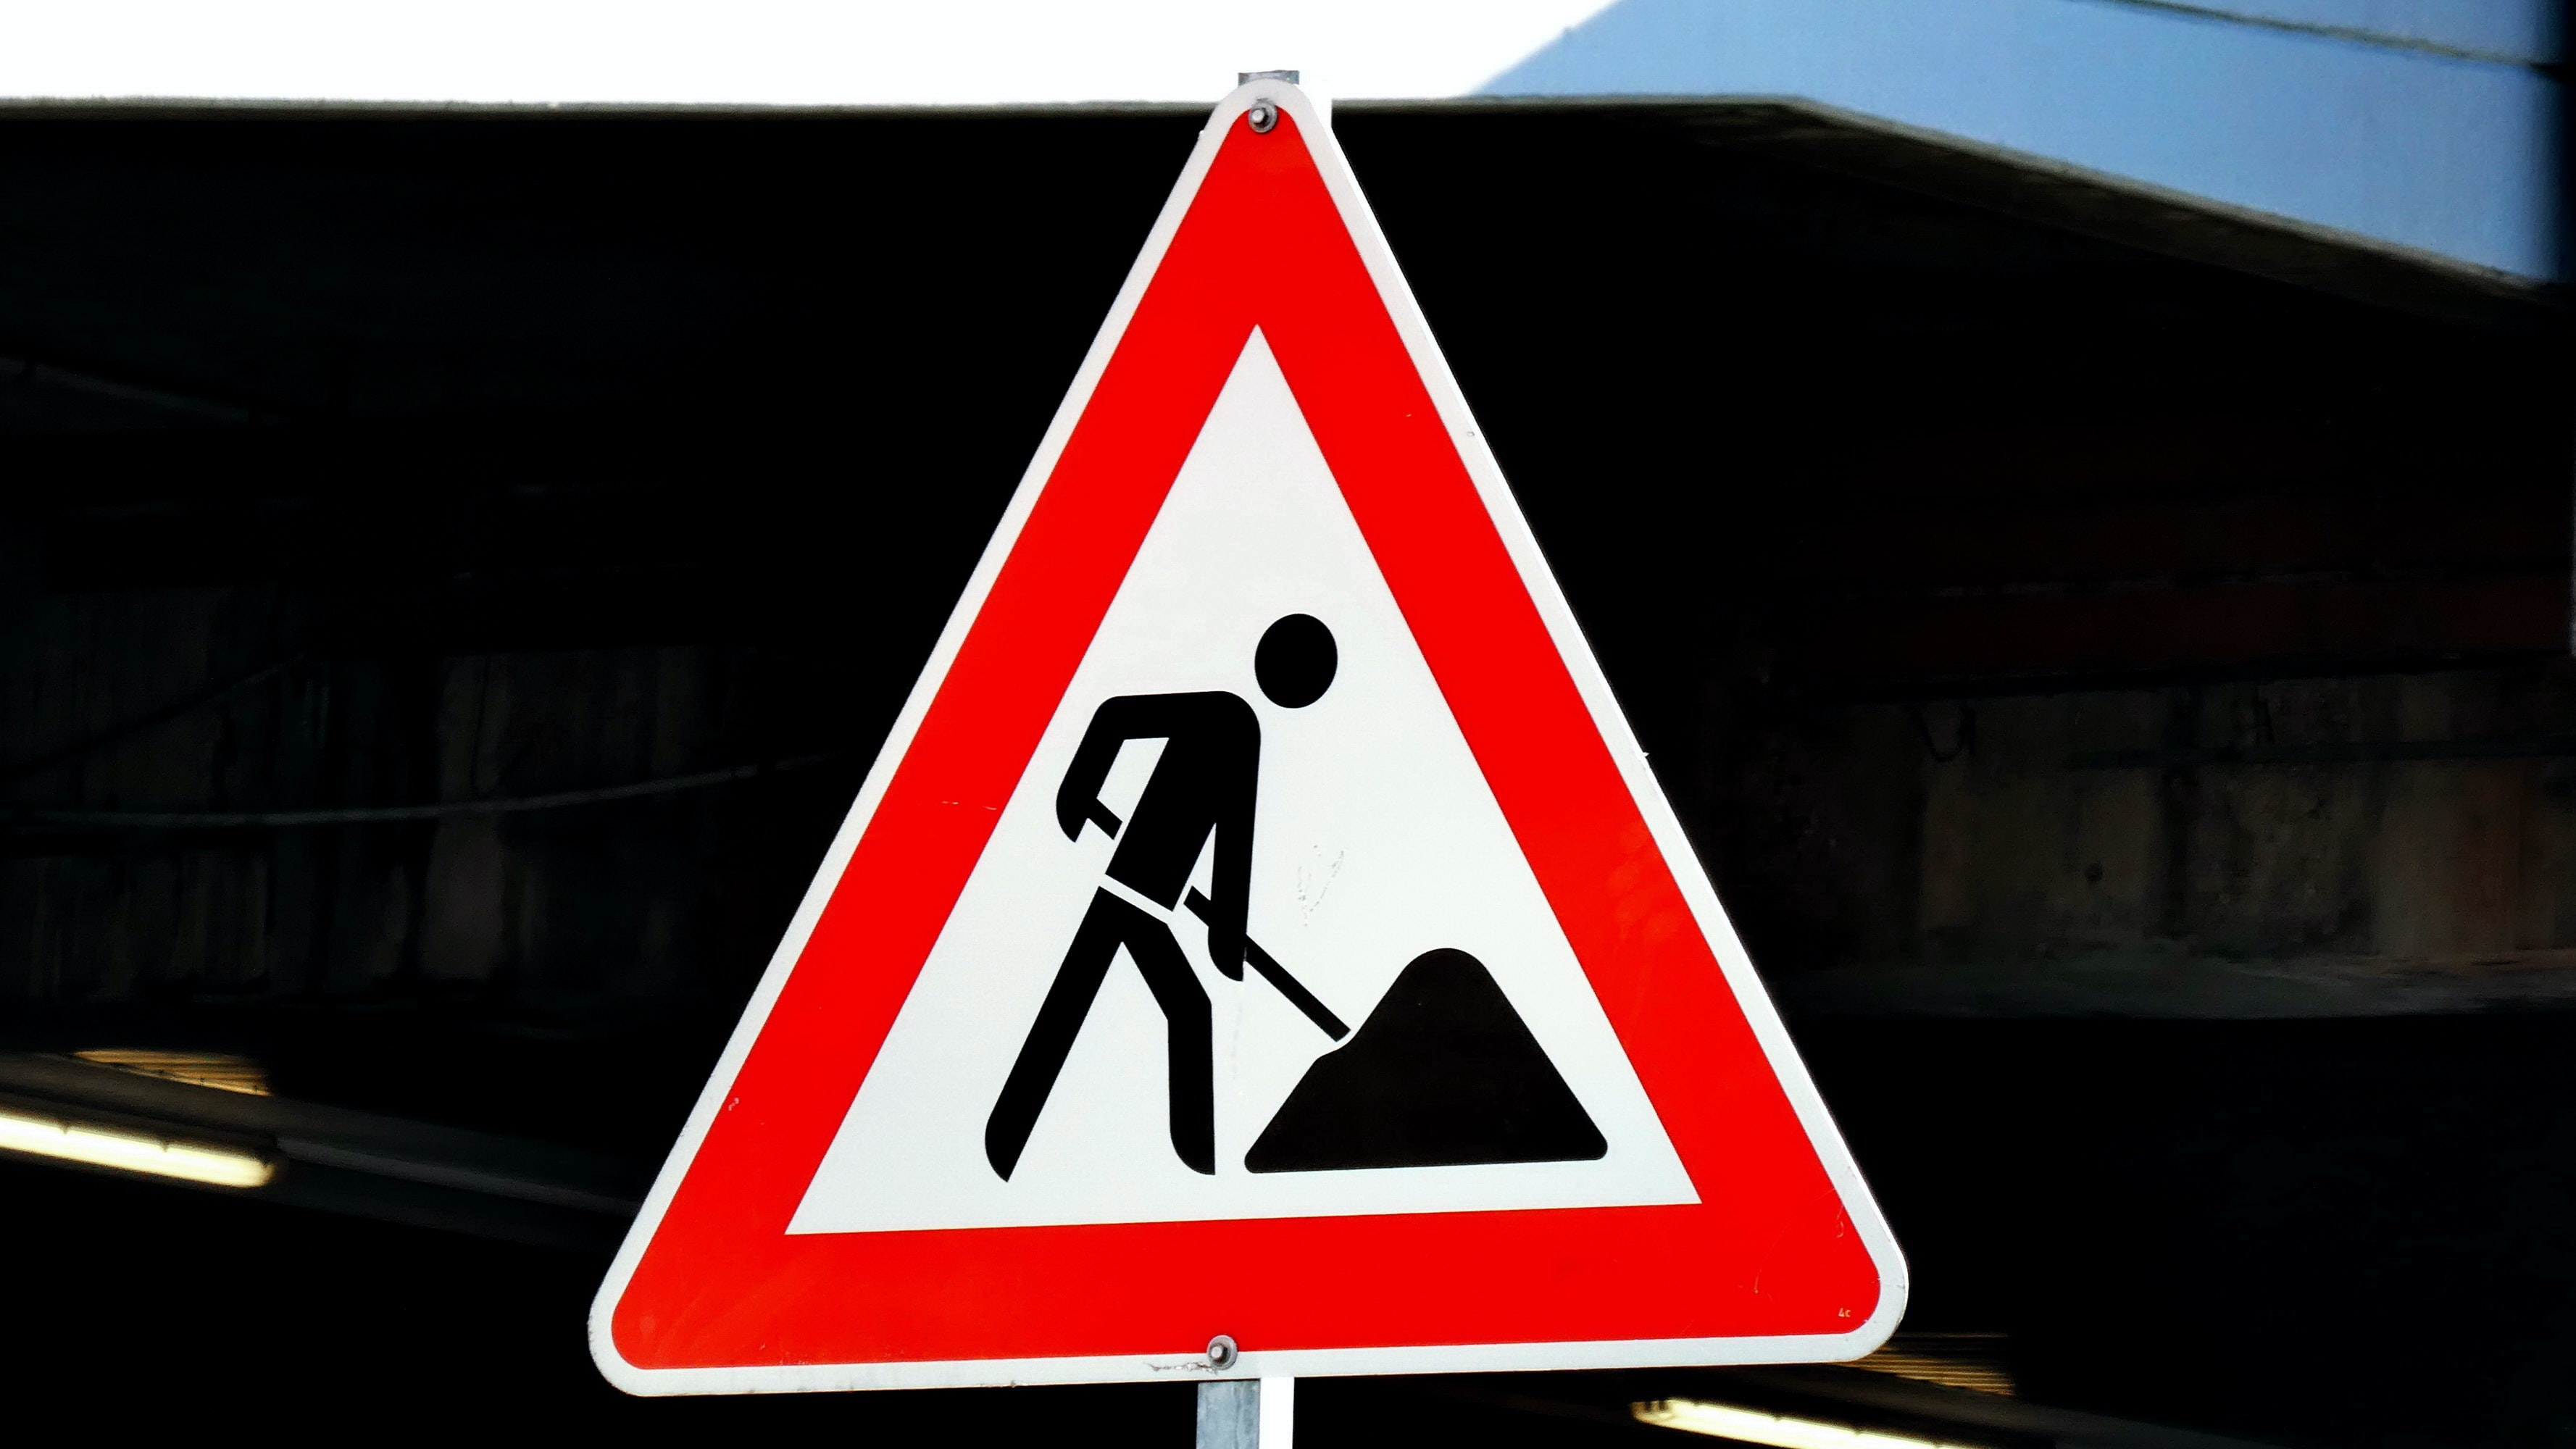